<a href="https://colab.research.google.com/github/laussin86/loan_default/blob/main/Loan_Default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve,auc)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
from sklearn.neural_network import MLPClassifier

In [2]:
#1. Check the datatypes of the attributes.
df = pd.read_csv("/content/drive/MyDrive/BCG/loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [19]:
#2. Are there any missing values in the dataset?
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [20]:
df.duplicated().sum()

0

In [3]:
# Convert 'credit.policy' and 'not.fully.paid' features to boolean type
df['credit.policy'] = df['credit.policy'].astype(bool)
df['not.fully.paid'] = df['not.fully.paid'].astype(bool)

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01
delinq.2yrs,9578.0,0.163708,0.546215,0.000000,0.000000,0.000000,0.000000,1.300000e+01


In [4]:
df.shape

(9578, 14)

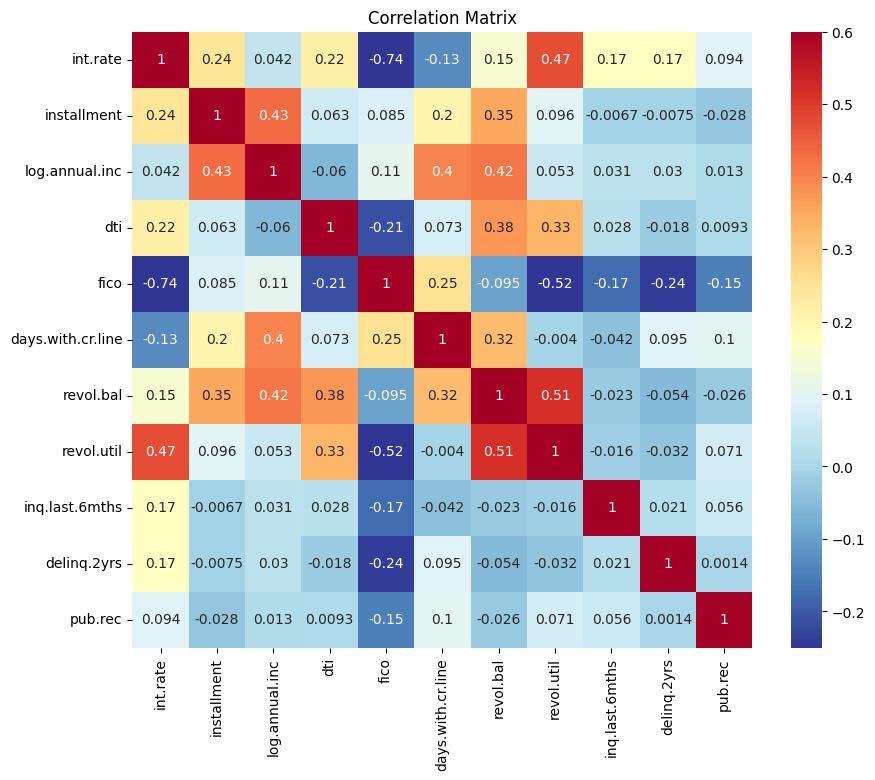

In [5]:
# correlation matrix
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corrMatrix = numeric_df.corr(method='spearman')
sn.heatmap(corrMatrix, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot=True, vmax = 0.6)
plt.title('Correlation Matrix')
plt.show()

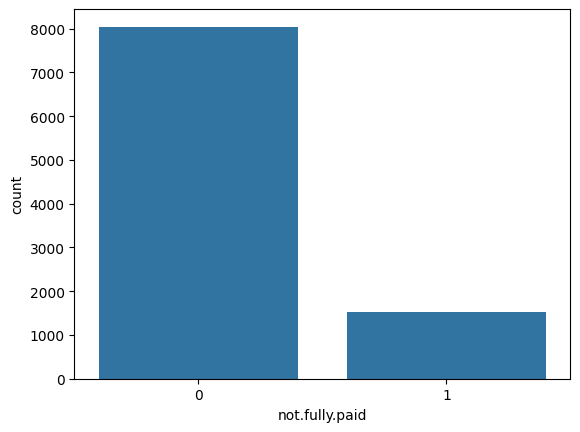

In [9]:
#4. Graph the frequency of loan status with fully paid and not
ax = sns.countplot(x="not.fully.paid",data=df)



In [ ]:
#PREPROCESSING AND EXPLORATORY ANALYSIS

In [10]:
len(df['purpose'].unique())

7

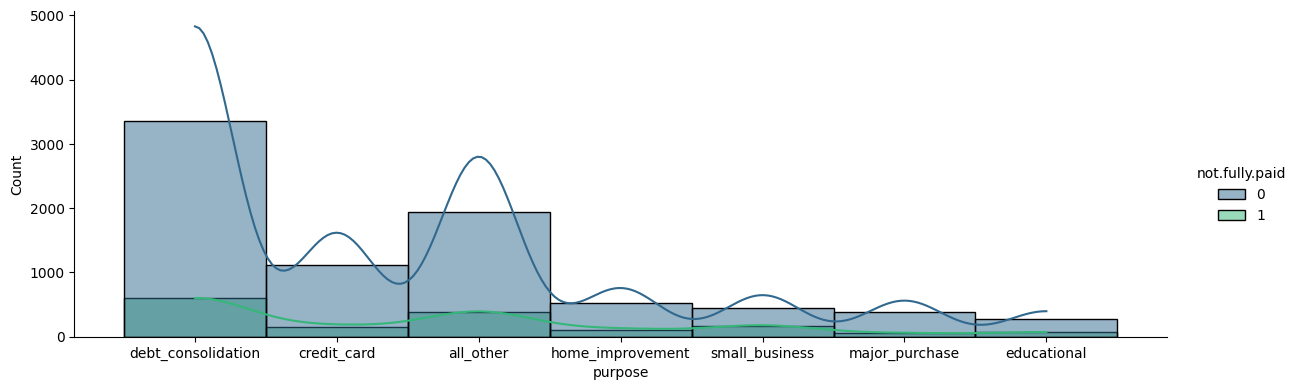

In [11]:
# lets check the purpose of people who defaulted their loan vs did not.
sns.displot(data=df, x='purpose', hue='not.fully.paid', bins=100, height=4, aspect=3, kde=True, palette='viridis');

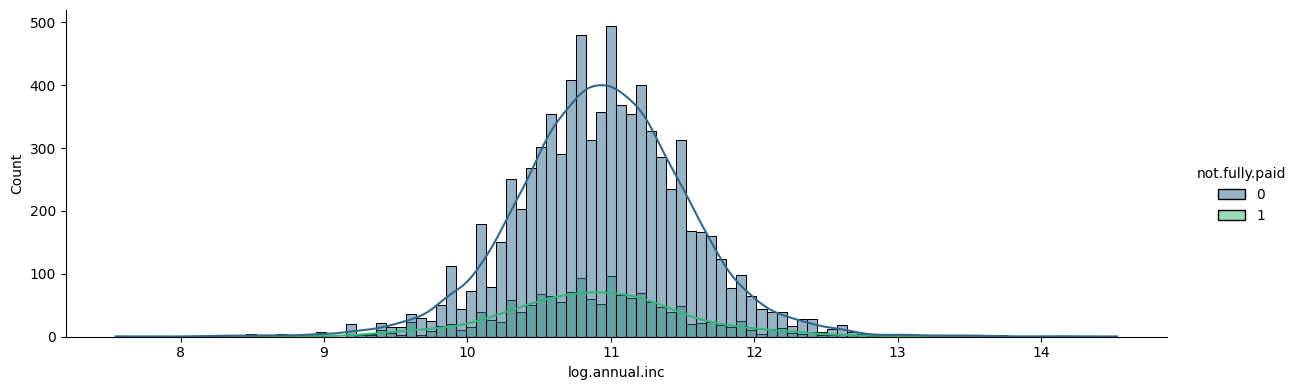

In [12]:
sns.displot(data=df, x='log.annual.inc', hue='not.fully.paid', bins=100, height=4, aspect=3, kde=True, palette='viridis');

In [13]:
#let's check the means
df.groupby('not.fully.paid')['log.annual.inc'].describe()


,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,10.941091,0.604045,7.547502,10.584056,10.933178,11.304720,14.528354
1,1533.0,10.885023,0.666718,7.600902,10.491274,10.878047,11.276633,13.458836


In [14]:
df.groupby('not.fully.paid')['days.with.cr.line'].describe()

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,4592.632624,2508.035500,178.958333,2820.041667,4140.041667,5760.000000,17639.95833
1,1533.0,4393.541259,2431.785491,180.041667,2759.958333,4050.000000,5580.041667,15692.00000


In [15]:
# we can see that there is difference between those  who defaulted so keep it


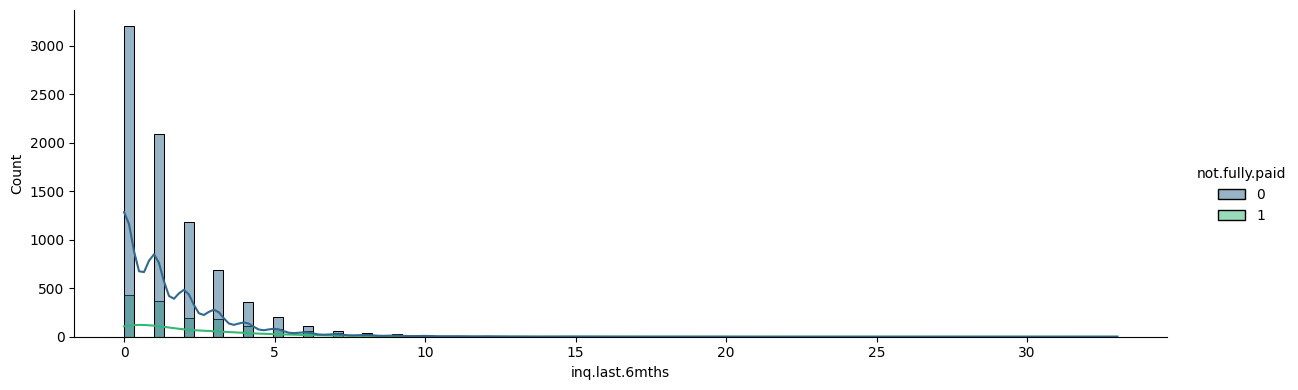

In [16]:
#let's check the distribution of months of inquiry with default or not
sns.displot(data=df, x='inq.last.6mths',hue='not.fully.paid', bins=100, height=4, aspect=3, kde=True, palette='viridis')


In [17]:
from itertools import groupby
#let check % of people default  by month of inquiry
inquiry_default = df[df['not.fully.paid']==1].groupby("inq.last.6mths").count()['not.fully.paid']
inquiry_not_default = df[df['not.fully.paid']==0].groupby("inq.last.6mths").count()['not.fully.paid']
per_default = (inquiry_default * 100)/(inquiry_default + inquiry_not_default)
per_default

inq.last.6mths
0     11.740445
1     15.109667
2     14.306358
3     20.833333
4     23.578947
5     27.338129
6     32.727273
7     37.000000
8     40.277778
9     36.170213
10    13.043478
11    20.000000
12    40.000000
13    33.333333
14    83.333333
15    55.555556
16          NaN
17    50.000000
18    50.000000
19          NaN
20          NaN
24          NaN
25          NaN
27          NaN
28          NaN
31          NaN
32          NaN
33          NaN
Name: not.fully.paid, dtype: float64

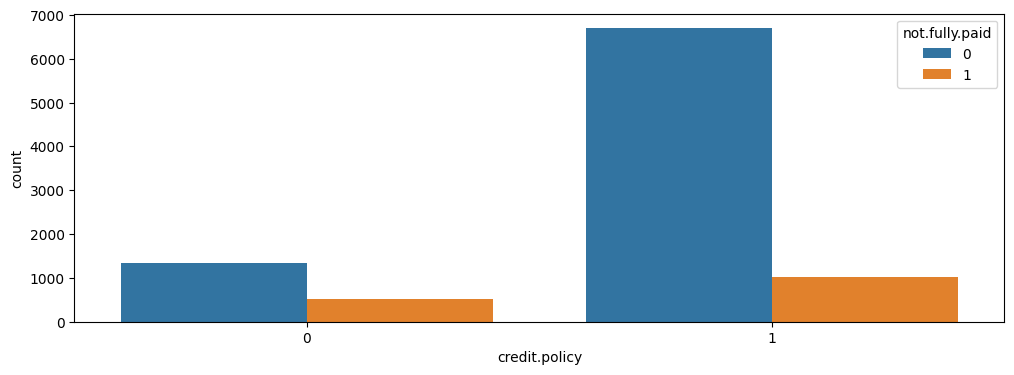

In [18]:
#let's check distribution of credit policy by loan status
plt.figure(figsize=(12,4))
ax = sns.countplot(x="credit.policy",data=df,hue='not.fully.paid')

In [19]:
# let's check percentage of charged off
credit_default = df[df['not.fully.paid']==1].groupby("credit.policy").count()['not.fully.paid']
credit_nodefault = df[df['not.fully.paid']==0].groupby("credit.policy").count()['not.fully.paid']
perc_default = (credit_default * 100)/(credit_default + credit_nodefault)
perc_default

credit.policy
0    27.783726
1    13.151751
Name: not.fully.paid, dtype: float64

In [20]:
# let's check percentage of charged off
installment_default = df[df['not.fully.paid']==1].groupby("installment").count()['not.fully.paid']
installment_nodefault = df[df['not.fully.paid']==0].groupby("installment").count()['not.fully.paid']
perce_default = (installment_default * 100)/(installment_default + installment_nodefault)
perce_default

installment
15.67      NaN
15.69      NaN
15.75      NaN
15.76      NaN
15.91      NaN
          ... 
916.95     NaN
918.02     NaN
922.42     NaN
926.83    50.0
940.14     NaN
Name: not.fully.paid, Length: 4788, dtype: float64

In [21]:
interest_Default = df[df['not.fully.paid']==1].groupby("int.rate").count()['not.fully.paid']
interest_noDefault = df[df['not.fully.paid']==0].groupby("int.rate").count()['not.fully.paid']
percen_default = (interest_Default * 100)/(interest_Default + interest_noDefault)
percen_default

int.rate
0.0600          NaN
0.0639          NaN
0.0676          NaN
0.0705    13.043478
0.0712          NaN
            ...    
0.2052    25.000000
0.2086    33.333333
0.2090    50.000000
0.2121    14.285714
0.2164          NaN
Name: not.fully.paid, Length: 249, dtype: float64

In [22]:
df.groupby('not.fully.paid')['int.rate'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,0.120770,0.026692,0.0600,0.0996,0.1218,0.1387,0.2121
1,1533.0,0.132452,0.025495,0.0705,0.1154,0.1316,0.1482,0.2164


In [23]:
df.groupby('not.fully.paid')['dti'].describe()
#clear difference between mean  charged off and fully paid so we keep it.

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,12.494413,6.855020,0.0,7.12,12.53,17.80,29.95
1,1533.0,13.195838,7.006769,0.0,7.83,13.34,18.83,29.96


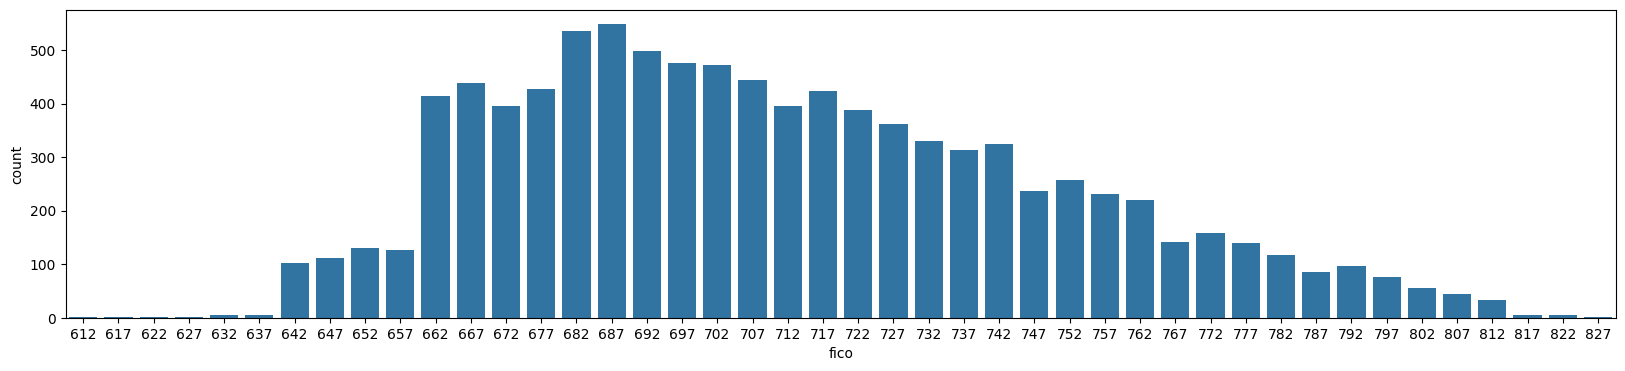

In [24]:
# distribution for FICO records
plt.figure(figsize=(20,4))
ax = sns.countplot(x="fico",data=df)

In [25]:
fico_Default = df[df['not.fully.paid']==1].groupby("fico").count()['not.fully.paid']
fico_noDefault = df[df['not.fully.paid']==0].groupby("fico").count()['not.fully.paid']
percent_default = (fico_Default * 100)/(fico_Default + fico_noDefault)
percent_default

fico
612          NaN
617          NaN
622          NaN
627    50.000000
632    66.666667
637    40.000000
642    28.431373
647    33.035714
652    29.007634
657    30.708661
662    22.463768
667    23.287671
672    20.759494
677    19.437939
682    16.977612
687    18.065693
692    16.064257
697    19.537815
702    18.432203
707    16.441441
712    14.430380
717    16.037736
722    13.402062
727    14.404432
732    11.515152
737    16.293930
742     9.567901
747    11.016949
752     8.914729
757     9.956710
762     6.818182
767     7.746479
772     8.860759
777     5.000000
782     5.932203
787     8.235294
792     3.092784
797     5.263158
802    12.727273
807     4.444444
812          NaN
817          NaN
822    20.000000
827          NaN
Name: not.fully.paid, dtype: float64

In [26]:
revol_Default = df[df['not.fully.paid']==1].groupby("revol.bal").count()['not.fully.paid']
revol_noDefault = df[df['not.fully.paid']==0].groupby("revol.bal").count()['not.fully.paid']
percenta_default = (revol_Default * 100)/(revol_Default + revol_noDefault)
percenta_default

revol.bal
0          18.380062
1          20.000000
2                NaN
3                NaN
4                NaN
             ...    
407794           NaN
508961           NaN
602519           NaN
952013           NaN
1207359          NaN
Name: not.fully.paid, Length: 7869, dtype: float64

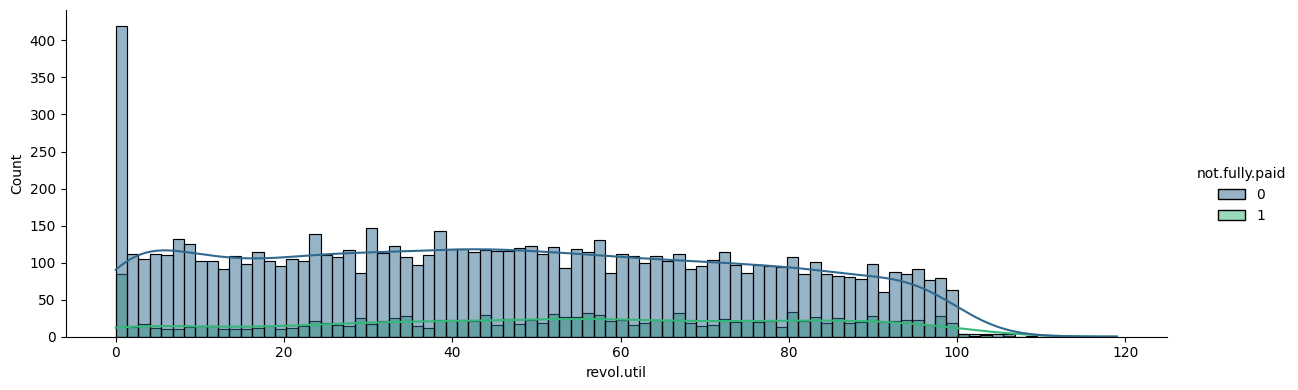

In [27]:
sns.displot(data=df, x='revol.util', hue='not.fully.paid', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [28]:
Revolutil_Default = df[df['not.fully.paid']==1].groupby("revol.util").count()['not.fully.paid']
Revolutil_noDefault = df[df['not.fully.paid']==0].groupby("revol.util").count()['not.fully.paid']
percentag_default = (Revolutil_Default * 100)/(Revolutil_Default + Revolutil_noDefault)
percentag_default

revol.util
0.00      17.845118
0.04            NaN
0.10      28.571429
0.20      25.000000
0.30       4.545455
            ...    
106.20          NaN
106.40          NaN
106.50          NaN
108.80          NaN
119.00          NaN
Name: not.fully.paid, Length: 1035, dtype: float64

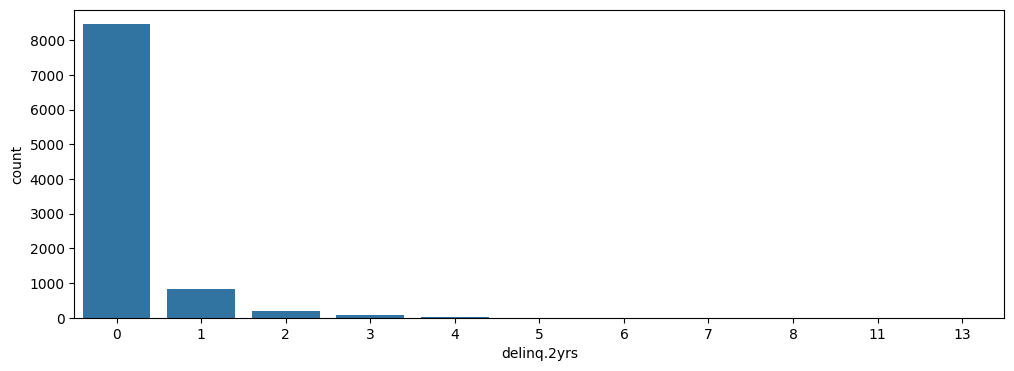

In [29]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="delinq.2yrs",data=df)

In [30]:
delinq_Default = df[df['not.fully.paid']==1].groupby("delinq.2yrs").count()['not.fully.paid']
delinq_noDefault = df[df['not.fully.paid']==0].groupby("delinq.2yrs").count()['not.fully.paid']
per_default = (delinq_Default * 100)/(delinq_Default + delinq_noDefault)
per_default

delinq.2yrs
0     15.807520
1     17.427885
2     17.708333
3     20.000000
4     21.052632
5           NaN
6           NaN
7           NaN
8           NaN
11          NaN
13          NaN
Name: not.fully.paid, dtype: float64

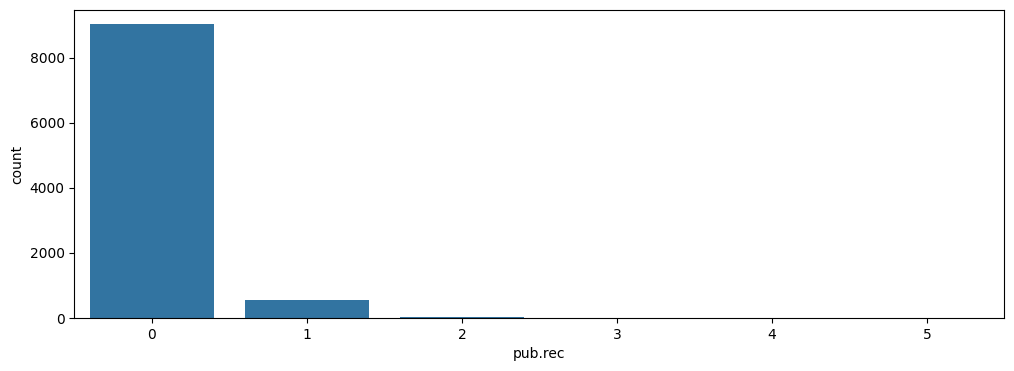

In [31]:
plt.figure(figsize=(12,4))
ax = sns.countplot(x="pub.rec",data=df)

In [32]:
Pub_Default = df[df['not.fully.paid']==1].groupby("pub.rec").count()['not.fully.paid']
Pub_noDefault = df[df['not.fully.paid']==0].groupby("pub.rec").count()['not.fully.paid']
p_default = (Pub_Default * 100)/(Pub_Default + Pub_noDefault)
p_default

pub.rec
0    15.467347
1    25.515947
2    10.526316
3          NaN
4          NaN
5          NaN
Name: not.fully.paid, dtype: float64

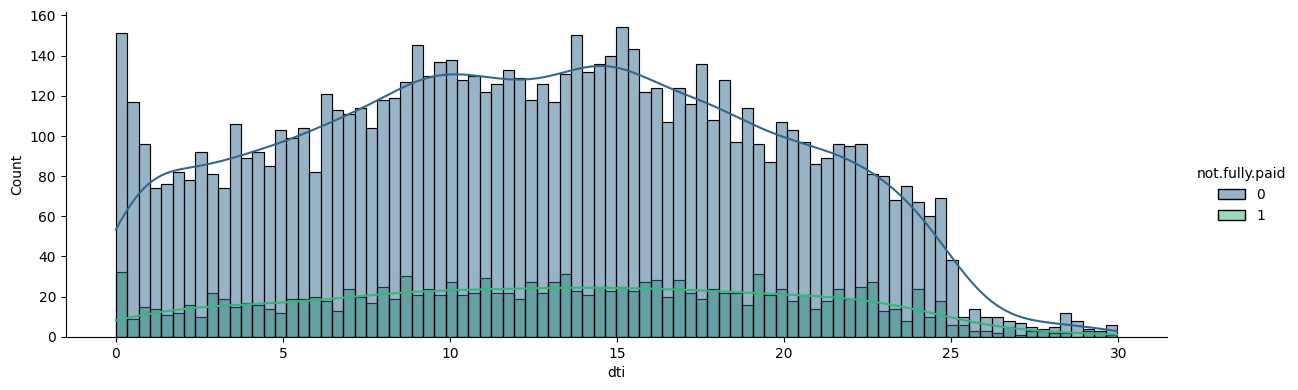

In [33]:
sns.displot(data=df, x='dti', hue='not.fully.paid', bins=88, height=4, aspect=3, kde=True, palette='viridis');

In [34]:
df.groupby('not.fully.paid')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
not.fully.paid,,,,,,,,
0,8045.0,12.494413,6.855020,0.0,7.12,12.53,17.80,29.95
1,1533.0,13.195838,7.006769,0.0,7.83,13.34,18.83,29.96


In [ ]:
#there is differences between means so we keep it.

In [6]:
df.dtypes.value_counts()

float64    6
int64      5
bool       2
object     1
Name: count, dtype: int64

In [7]:
#one hot-encoding
df = pd.get_dummies(df)

In [8]:
display(df.head())

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,True,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,False,False,False,True,False,False,False,False
1,True,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,False,False,True,False,False,False,False,False
2,True,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,False,False,False,True,False,False,False,False
3,True,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,False,False,False,True,False,False,False,False
4,True,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,False,False,True,False,False,False,False,False


In [ ]:
#SCALING AND TRAIN TEST SPLITING

In [9]:
# lets first check the final dimension of our dataset after the preprocessing step
df.shape

(9578, 20)

In [10]:
# let's now split our dataset
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('not.fully.paid', axis=1), df[['not.fully.paid']],
    test_size=0.20, random_state=3)

In [11]:
# let's scale our train and test.
scaler = StandardScaler()
# We need to fit the scaler to our data before transformation
df.loc[:, df.columns != 'not.fully.paid'] = scaler.fit_transform(df.loc[:, df.columns != 'not.fully.paid'])


In [12]:
print(y_train.shape)
print(X_train.shape)

(7662, 1)
(7662, 19)


In [33]:
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBClassifier(random_state=3),
                         parameter_space, cv=5, n_jobs=4,
                         scoring="accuracy",
                         random_state=3, n_iter=10)

clf.fit(X_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.3, 'reg_lambda': 3, 'reg_alpha': 33, 'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.009, 'gamma': 7, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.5, 'booster': 'gbtree'}


In [34]:
model = XGBClassifier(**clf.best_params_)

In [35]:
#XGBoost
#let's first fit the model to the train data
xgb_model= model.fit(X_train, y_train)

In [36]:
# now let's create the prediciton
preds = xgb_model.predict(X_test)

In [37]:
# The confusion Matrix
confusion_matrix(y_test,preds)

array([[1618,    0],
       [ 298,    0]])

In [38]:
#let's see now the metrics based on XGBoost
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       False       0.84      1.00      0.92      1618
        True       0.00      0.00      0.00       298

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Feature Importances

In [39]:
pd.DataFrame(X_train)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
3551,True,0.0894,476.58,11.184421,10.20,782,13334.958330,4254,23.9,0,0,0,False,False,False,True,False,False,False
9257,False,0.1392,238.96,10.308953,3.60,692,3839.958333,896,57.7,4,0,0,False,False,False,False,False,True,False
330,True,0.0743,62.15,11.127145,9.99,767,8190.041667,2475,5.4,1,1,0,True,False,False,False,False,False,False
6251,True,0.1357,407.63,11.492764,0.18,712,5970.041667,440,7.9,1,0,0,False,False,True,False,False,False,False
1440,True,0.1083,653.17,11.082204,8.20,742,4171.000000,12418,66.2,1,0,0,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8981,False,0.1379,302.42,11.379394,24.99,692,2640.958333,122464,87.7,1,0,0,False,True,False,False,False,False,False
6400,True,0.1148,164.85,10.085809,11.00,732,2612.041667,4159,59.4,1,0,0,True,False,False,False,False,False,False
9160,False,0.1411,410.75,11.302204,9.97,672,3270.000000,78250,54.2,0,0,0,False,False,True,False,False,False,False
1688,True,0.0932,319.47,11.643954,0.45,772,6244.041667,755,1.6,0,0,0,False,False,False,False,True,False,False


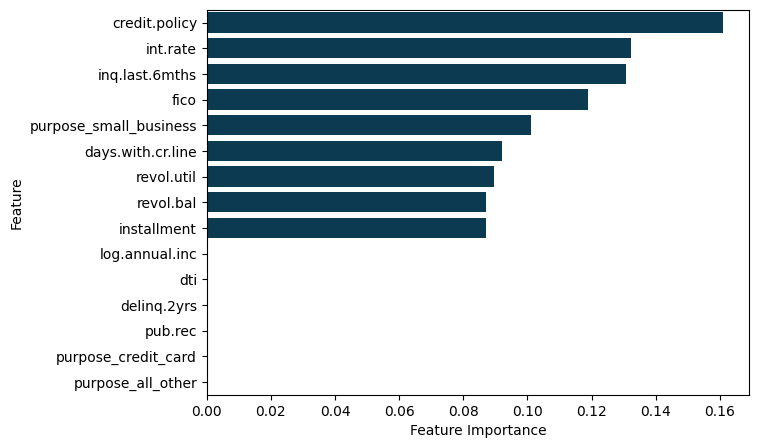

In [40]:

xgb_feature_importances = model.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, index=X_train.columns)
xgb_feature_importances = xgb_feature_importances.sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances,
            y=xgb_feature_importances.index,
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

In [132]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test)

In [133]:
confusion_matrix(y_test,y_pred_dt)

array([[1570,   48],
       [ 266,   32]])

In [134]:
#let's see now the metrics based on Decision tree
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

       False       0.86      0.97      0.91      1618
        True       0.40      0.11      0.17       298

    accuracy                           0.84      1916
   macro avg       0.63      0.54      0.54      1916
weighted avg       0.78      0.84      0.79      1916



In [135]:
# Random Forest
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest classifier with optimal parameters
best_rf_classifier = grid_search_rf.best_estimator_

# Predict on the test set and evaluate performance
y_pred_rf = best_rf_classifier.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [136]:
confusion_matrix(y_test,y_pred_rf)

array([[1616,    2],
       [ 295,    3]])

In [137]:
#let's see now the metrics based on Random Forest
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.85      1.00      0.92      1618
        True       0.60      0.01      0.02       298

    accuracy                           0.84      1916
   macro avg       0.72      0.50      0.47      1916
weighted avg       0.81      0.84      0.78      1916



In [42]:
# Logistic Regression
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train, y_train)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [43]:
confusion_matrix(y_test,y_pred_logreg)

array([[1609,    9],
       [ 290,    8]])

In [44]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1618
           1       0.47      0.03      0.05       298

    accuracy                           0.84      1916
   macro avg       0.66      0.51      0.48      1916
weighted avg       0.79      0.84      0.78      1916



In [13]:
y_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7662 entries, 3551 to 5994
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   not.fully.paid  7662 non-null   bool 
dtypes: bool(1)
memory usage: 67.3 KB


In [14]:
sm = SMOTE(random_state = 2)
X_train_resample, y_train_resample = sm.fit_resample(X_train, np.ravel(y_train))

In [15]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_resample.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_resample.shape))

After OverSampling, the shape of train_X: (12854, 19)
After OverSampling, the shape of train_y: (12854,) 



In [16]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_resample == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_resample == 0)))

After OverSampling, counts of label '1': 6427
After OverSampling, counts of label '0': 6427


In [44]:
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBClassifier(random_state=3),
                         parameter_space, cv=5, n_jobs=4,
                         scoring="accuracy",
                         random_state=3, n_iter=10)

clf.fit(X_train_resample, y_train_resample)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 2500, 'max_depth': 6, 'learning_rate': 0.005, 'gamma': 7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'booster': 'gbtree'}


In [45]:
#XGBoost
model = XGBClassifier(**clf.best_params_)
model.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
preds = model.predict(X_test)

In [47]:
confusion_matrix(y_test,preds)

array([[1502,  116],
       [ 246,   52]])

In [48]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       False       0.86      0.93      0.89      1618
        True       0.31      0.17      0.22       298

    accuracy                           0.81      1916
   macro avg       0.58      0.55      0.56      1916
weighted avg       0.77      0.81      0.79      1916



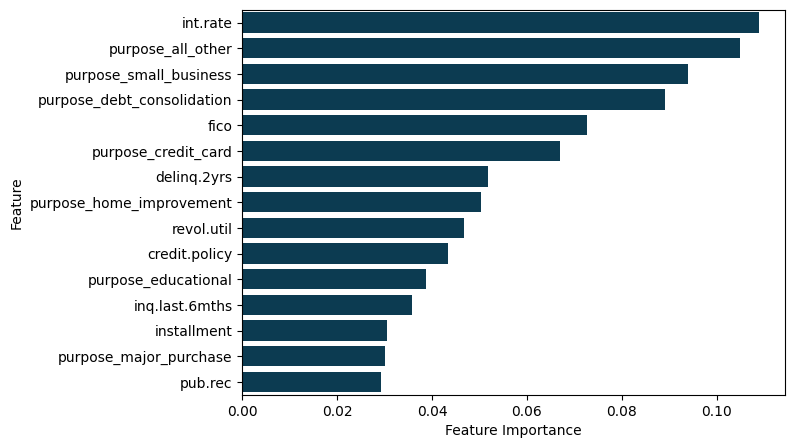

In [49]:
xgb_feature_importances = model.feature_importances_
xgb_feature_importances = pd.Series(xgb_feature_importances, index=X_train.columns)
xgb_feature_importances = xgb_feature_importances.sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=xgb_feature_importances,
            y=xgb_feature_importances.index,
            color="#003f5c");
plt.xlabel('Feature Importance');
plt.ylabel('Feature');

In [50]:
# Logistic Regression
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train_resample, y_train_resample)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [51]:
confusion_matrix(y_test,y_pred_logreg )

array([[1574,   44],
       [ 274,   24]])

In [52]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

       False       0.85      0.97      0.91      1618
        True       0.35      0.08      0.13       298

    accuracy                           0.83      1916
   macro avg       0.60      0.53      0.52      1916
weighted avg       0.77      0.83      0.79      1916



In [53]:
# Random Forest
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_resample, y_train_resample)

# Get the best Random Forest classifier with optimal parameters
best_rf_classifier = grid_search_rf.best_estimator_

# Predict on the test set and evaluate performance
y_pred_rf = best_rf_classifier.predict(X_test)

In [54]:
confusion_matrix(y_test,y_pred_rf)

array([[1541,   77],
       [ 264,   34]])

In [55]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.85      0.95      0.90      1618
        True       0.31      0.11      0.17       298

    accuracy                           0.82      1916
   macro avg       0.58      0.53      0.53      1916
weighted avg       0.77      0.82      0.79      1916



In [56]:

dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_resample, y_train_resample)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test)

In [57]:
confusion_matrix(y_test,y_pred_dt)

array([[1270,  348],
       [ 222,   76]])

In [58]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

       False       0.85      0.78      0.82      1618
        True       0.18      0.26      0.21       298

    accuracy                           0.70      1916
   macro avg       0.52      0.52      0.51      1916
weighted avg       0.75      0.70      0.72      1916



In [59]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (train_test_split,
                                     cross_val_score,
                                     RandomizedSearchCV,
                                     GridSearchCV)
# Define the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_resample, y_train_resample)

# Get the best k-NN classifier with optimal parameters
best_knn_classifier = grid_search_knn.best_estimator_
# Predict on the test set and evaluate performance
y_pred_knn = best_knn_classifier.predict(X_test)

In [60]:
confusion_matrix(y_test,y_pred_knn)

array([[1104,  514],
       [ 179,  119]])

In [61]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

       False       0.86      0.68      0.76      1618
        True       0.19      0.40      0.26       298

    accuracy                           0.64      1916
   macro avg       0.52      0.54      0.51      1916
weighted avg       0.76      0.64      0.68      1916



In [62]:
from sklearn.naive_bayes import GaussianNB
# Define the Naive Bayes (GaussianNB) classifier
nb_classifier = GaussianNB()

# No hyperparameter tuning for Naive Bayes, use default settings

# Train the classifier on the resampled training data
nb_classifier.fit(X_train_resample, y_train_resample)

# Predict on the test set and evaluate performance
y_pred_nb = nb_classifier.predict(X_test)

In [63]:
confusion_matrix(y_test,y_pred_nb)

array([[1023,  595],
       [ 142,  156]])

In [64]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

       False       0.88      0.63      0.74      1618
        True       0.21      0.52      0.30       298

    accuracy                           0.62      1916
   macro avg       0.54      0.58      0.52      1916
weighted avg       0.77      0.62      0.67      1916



In [65]:
#calculate AUC of model Xgboost
auc = metrics.roc_auc_score(y_test, preds)

In [66]:
print(auc)

0.5514015977966003


In [67]:
#calculate AUC of model Random Forest
auc = metrics.roc_auc_score(y_test, y_pred_rf)
print(auc)

0.533252171460333


In [68]:
#calculate AUC of model logistic regression
auc = metrics.roc_auc_score(y_test, y_pred_logreg)
print(auc)

0.5266714230013024


In [69]:
#calculate AUC of model Naive Bayes (GaussianNB) classifier
auc = metrics.roc_auc_score(y_test, y_pred_nb)
print(auc)

0.5778759924009258


In [70]:
#calculate AUC of model k-NN classifier
auc = metrics.roc_auc_score(y_test, y_pred_knn)
print(auc)


0.5408263578367526


In [71]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [80]:


# Define the neural network model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

# Train the model on the resampled training data
mlp_classifier.fit(X_train_resample, y_train_resample)

# Predict on the test set and evaluate performance
y_pred_mlp = mlp_classifier.predict(X_test)
confusion_matrix(y_test,y_pred_mlp)
print(classification_report(y_test,y_pred_mlp))

#calculate AUC of model Neural Network
auc = metrics.roc_auc_score(y_test, y_pred_mlp)
print(auc)


              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1618
           1       0.26      0.09      0.14       298

    accuracy                           0.82      1916
   macro avg       0.56      0.52      0.52      1916
weighted avg       0.76      0.82      0.78      1916

0.5225670103948035


60/60 [==============================] - 0s 2ms/step


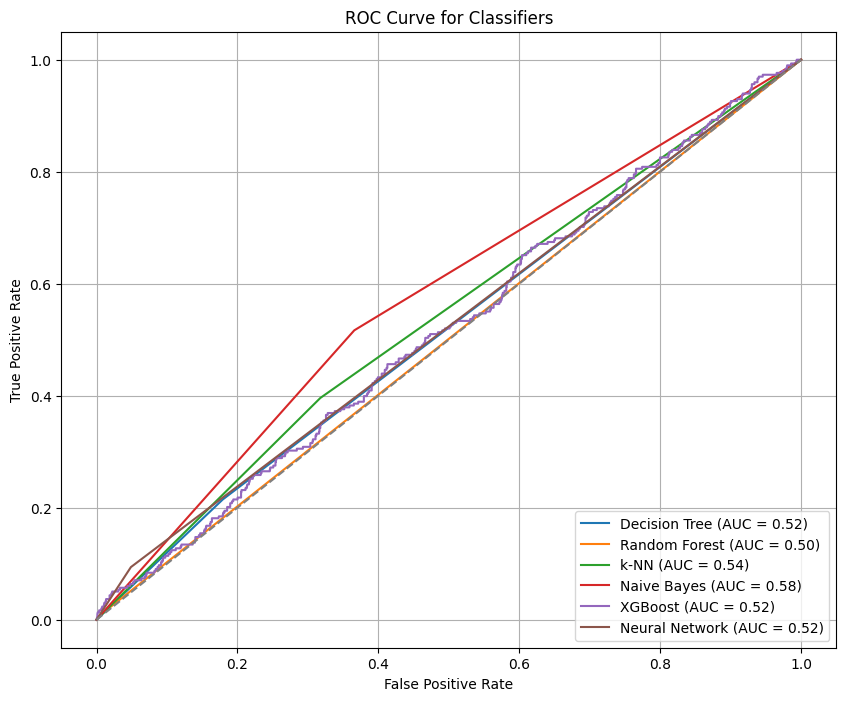

In [82]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
    #'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': model,
    'Neural Network': mlp_classifier
}

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its ROC curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_positive)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

60/60 [==============================] - 0s 2ms/step


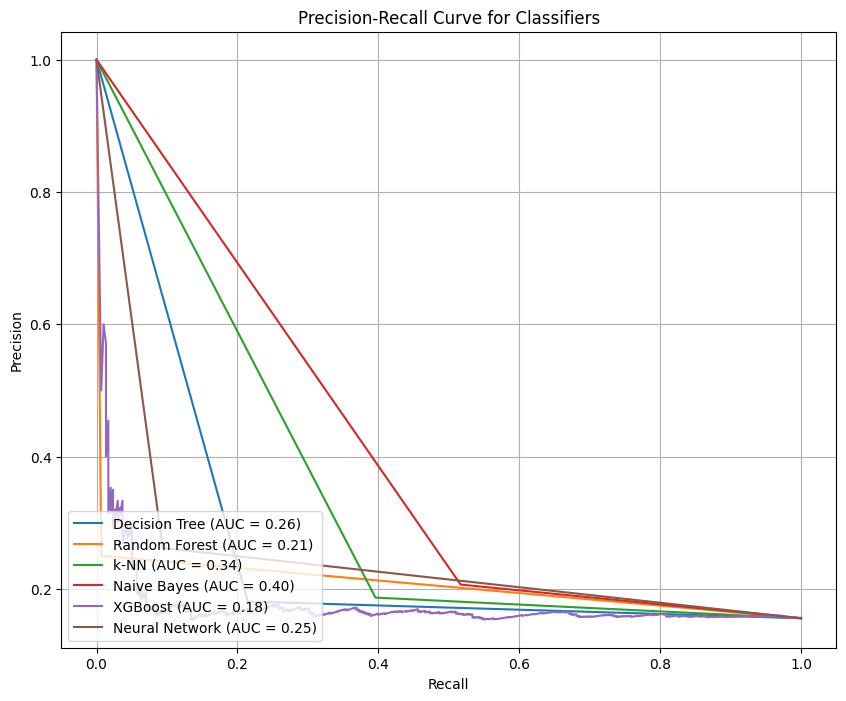

In [85]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
    #'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': model,
    'Neural Network': mlp_classifier
}

# Create a figure for PR curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its PR curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob_positive)

    # Calculate PR AUC score
    pr_auc = auc(recall, precision)

    # Plot PR curve for each classifier
    plt.plot(recall, precision, label=f'{clf_name} (AUC = {pr_auc:.2f})')

# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifiers')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

**Principal Component Analysis (PCA)**


In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

In [18]:
X_train_temp=X_train_resample.copy()
X_test_temp=X_test.copy()
y_train_temp=y_train_resample.copy()
y_test_temp=y_test.copy()

In [19]:
#Initially ,assign the number of components to "None"
pca_temp = PCA(n_components=None)
X_train_temp = pca_temp.fit_transform(X_train_temp)
X_test_temp= pca_temp.transform(X_test_temp)

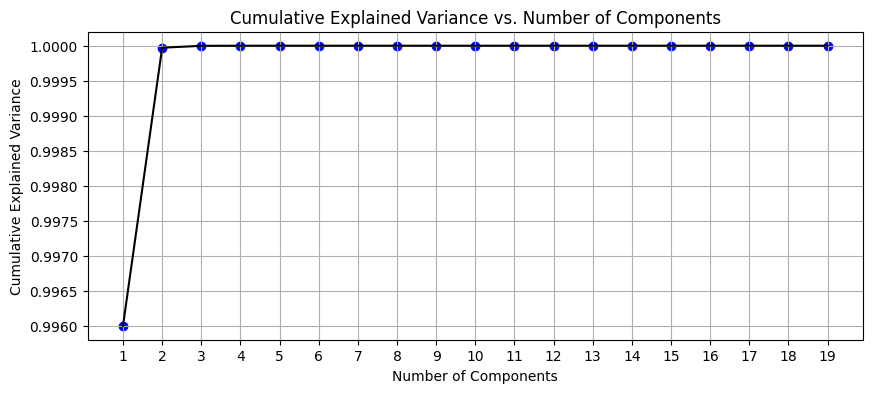

In [20]:
# Variance ratio
explained_variance_ratio = pca_temp.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Visualize the Feature size importance
plt.figure(figsize=(10, 4))
plt.scatter(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color="blue")
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color="black")
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()


In [21]:
#PCA
pca= PCA(n_components=None)
X_train_transformed= pca.fit_transform(X_train_resample)
X_test_transformed= pca.transform(X_test)

In [22]:
# Logistic Regression
log_reg = LogisticRegression()

# Define the parameter grid for GridSearchCV
param_grid_logreg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Perform GridSearchCV to find the best parameters
grid_search_logreg = GridSearchCV(estimator=log_reg, param_grid=param_grid_logreg, scoring='accuracy', cv=5)
grid_search_logreg.fit(X_train_transformed, y_train_resample)

# Get the best Logistic Regression model with optimal parameters
best_log_reg = grid_search_logreg.best_estimator_

# Evaluate the best model on the test set
y_pred_logreg = best_log_reg.predict(X_test_transformed)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [23]:
confusion_matrix(y_test,y_pred_logreg)

array([[1531,   87],
       [ 258,   40]])

In [24]:
print(classification_report(y_test,y_pred_logreg))

              precision    recall  f1-score   support

       False       0.86      0.95      0.90      1618
        True       0.31      0.13      0.19       298

    accuracy                           0.82      1916
   macro avg       0.59      0.54      0.54      1916
weighted avg       0.77      0.82      0.79      1916



In [25]:
# Random Forest
rf_classifier = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_transformed, y_train_resample)

# Get the best Random Forest classifier with optimal parameters
best_rf_classifier = grid_search_rf.best_estimator_

# Predict on the test set and evaluate performance
y_pred_rf = best_rf_classifier.predict(X_test_transformed)

In [26]:
confusion_matrix(y_test,y_pred_rf)

array([[1554,   64],
       [ 281,   17]])

In [27]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.85      0.96      0.90      1618
        True       0.21      0.06      0.09       298

    accuracy                           0.82      1916
   macro avg       0.53      0.51      0.49      1916
weighted avg       0.75      0.82      0.77      1916



In [28]:
dt_classifier = DecisionTreeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best parameters
grid_search_dt = GridSearchCV(estimator=dt_classifier, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_transformed, y_train_resample)

# Get the best Decision Tree classifier with optimal parameters
best_dt_classifier = grid_search_dt.best_estimator_

# Predict on the test set and evaluate performance
y_pred_dt = best_dt_classifier.predict(X_test_transformed)

In [29]:
confusion_matrix(y_test,y_pred_dt)

array([[1236,  382],
       [ 206,   92]])

In [30]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

       False       0.86      0.76      0.81      1618
        True       0.19      0.31      0.24       298

    accuracy                           0.69      1916
   macro avg       0.53      0.54      0.52      1916
weighted avg       0.75      0.69      0.72      1916



In [31]:
parameter_space = \
    {
        "max_depth": [4, 5, 6],
        "learning_rate": [0.005, 0.009, 0.01],
        "n_estimators": [700, 1000, 2500],
        "booster": ["gbtree",],
        "gamma": [7, 25, 100],
        "subsample": [0.3, 0.6],
        "colsample_bytree": [0.5, 0.7],
        "colsample_bylevel": [0.5, 0.7,],
        "reg_alpha": [1, 10, 33],
        "reg_lambda": [1, 3, 10],
    }

clf = RandomizedSearchCV(XGBClassifier(random_state=3),
                         parameter_space, cv=5, n_jobs=4,
                         scoring="accuracy",
                         random_state=3, n_iter=10)

clf.fit(X_train_transformed, y_train_resample)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 10, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 7, 'colsample_bytree': 0.5, 'colsample_bylevel': 0.7, 'booster': 'gbtree'}


In [32]:
model = XGBClassifier(**clf.best_params_)
model.fit(X_train_transformed, y_train_resample)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=7, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [33]:
preds = model.predict(X_test_transformed)

In [34]:
confusion_matrix(y_test,preds)

array([[1532,   86],
       [ 272,   26]])

In [35]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

       False       0.85      0.95      0.90      1618
        True       0.23      0.09      0.13       298

    accuracy                           0.81      1916
   macro avg       0.54      0.52      0.51      1916
weighted avg       0.75      0.81      0.78      1916



In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Define the k-NN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV to find the best parameters
grid_search_knn = GridSearchCV(estimator=knn_classifier, param_grid=param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_transformed, y_train_resample)

# Get the best k-NN classifier with optimal parameters
best_knn_classifier = grid_search_knn.best_estimator_
# Predict on the test set and evaluate performance
y_pred_knn = best_knn_classifier.predict(X_test_transformed)

In [37]:
confusion_matrix(y_test,y_pred_knn)

array([[1099,  519],
       [ 178,  120]])

In [38]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

       False       0.86      0.68      0.76      1618
        True       0.19      0.40      0.26       298

    accuracy                           0.64      1916
   macro avg       0.52      0.54      0.51      1916
weighted avg       0.76      0.64      0.68      1916



In [39]:
from sklearn.naive_bayes import GaussianNB
# Define the Naive Bayes (GaussianNB) classifier
nb_classifier = GaussianNB()

# No hyperparameter tuning for Naive Bayes, use default settings

# Train the classifier on the resampled training data
nb_classifier.fit(X_train_transformed, y_train_resample)

# Predict on the test set and evaluate performance
y_pred_nb = nb_classifier.predict(X_test_transformed)

In [40]:
confusion_matrix(y_test,y_pred_nb)

array([[1156,  462],
       [ 172,  126]])

In [41]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

       False       0.87      0.71      0.78      1618
        True       0.21      0.42      0.28       298

    accuracy                           0.67      1916
   macro avg       0.54      0.57      0.53      1916
weighted avg       0.77      0.67      0.71      1916



In [44]:
# Define the neural network model
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)

# Train the model on the resampled training data
mlp_classifier.fit(X_train_transformed, y_train_resample)

# Predict on the test set and evaluate performance
y_pred_mlp = mlp_classifier.predict(X_test_transformed)
confusion_matrix(y_test,y_pred_mlp)
print(classification_report(y_test,y_pred_mlp))

#calculate AUC of model Neural Network
auc = metrics.roc_auc_score(y_test, y_pred_mlp)
print(auc)


              precision    recall  f1-score   support

       False       0.89      0.11      0.20      1618
        True       0.16      0.93      0.28       298

    accuracy                           0.24      1916
   macro avg       0.53      0.52      0.24      1916
weighted avg       0.78      0.24      0.21      1916

0.5205656166781427


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


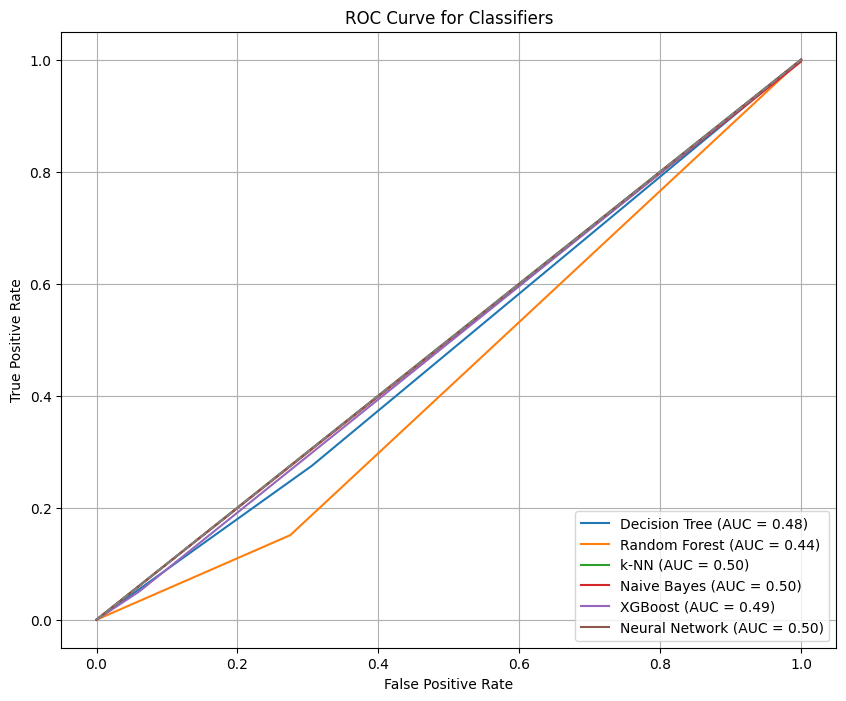

In [45]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
    #'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': model,
    'Neural Network': mlp_classifier
}

# Create a figure for ROC curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its ROC curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob_positive)

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve for each classifier
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal (random guess line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


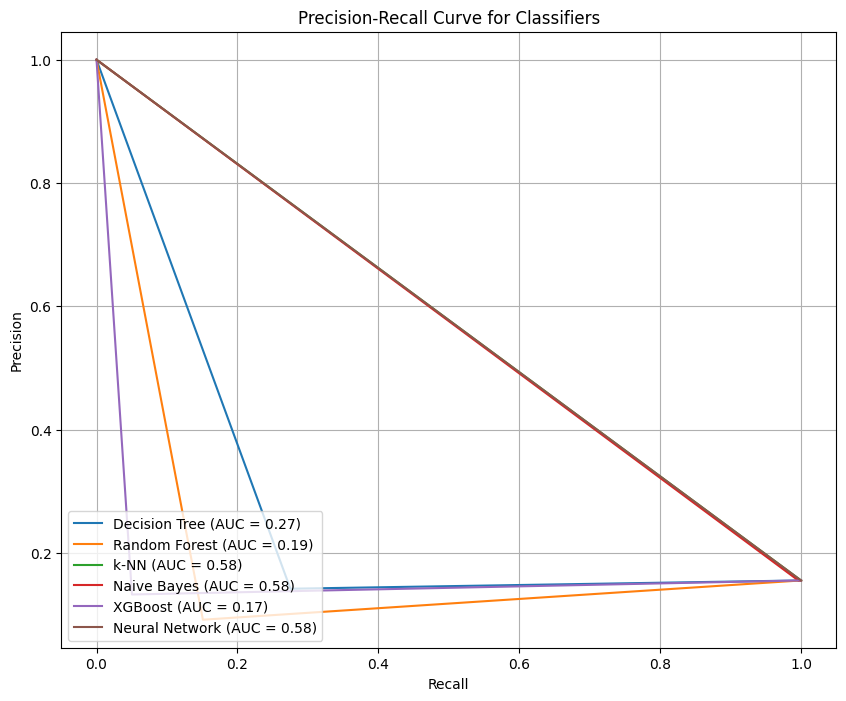

In [48]:
# Define a dictionary to store classifiers
classifiers = {
    'Decision Tree': best_dt_classifier,
    'Random Forest': best_rf_classifier,
    #'Logistic Regression': best_log_reg,
    'k-NN': best_knn_classifier,
    'Naive Bayes': nb_classifier,
    'XGBoost': model,
    'Neural Network': mlp_classifier
}

# Create a figure for PR curves
plt.figure(figsize=(10, 8))

# Iterate through each classifier and plot its PR curve
for clf_name, clf in classifiers.items():
    # Make predictions on the test set to obtain probabilities
    y_prob = clf.predict(X_test)
    # Extract probabilities for the positive class
    if len(y_prob.shape) > 1 and y_prob.shape[1] > 1:
        y_prob_positive = y_prob[:, 1]  # If probabilities for each class are available
    else:
        y_prob_positive = y_prob

    # Compute precision-recall curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob_positive)

    # Calculate PR AUC score
    pr_auc = auc(recall, precision)

    # Plot PR curve for each classifier
    plt.plot(recall, precision, label=f'{clf_name} (AUC = {pr_auc:.2f})')

# Add labels and title to the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Classifiers')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()